# **Creating Plots That Present Summary Statistics of Your Data**
When datasets are huge, it is sometimes useful to look at the summary statistics of a range of different features and get a preliminary idea of the dataset. 

For example, the summary statistics for any numerical feature include measures of *central tendency*, such as the *mean*, and measures of dispersion, such as the *standard deviation*.

When a dataset is too small, plots presenting summary statistics may actually be misleading because summary statistics are meaningful only when the dataset is big enough to draw statistical conclusions. 

For example, if somebody reports the variance of a feature using five data points, we cannot make any concrete conclusions regarding the dispersion of the feature.

**Histogram Revisited**

Let's revisit histograms from firsts excersises. Although histograms show the distribution of a given feature in data, we can make a plot a little more informative by showing some summary statistics in the same plot. 

Let's go back to our **mpg** dataset and draw a histogram to analyze the spread of vehicle weights in the dataset.


# **Example 19: Histogram Revisited**
Import the necessary Python modules; load the dataset; choose number of bins and whether the kernel density estimate should be shown or not; Use red color to show mean using a straight line on the x axis (parallel to y axis); define the location of legend.

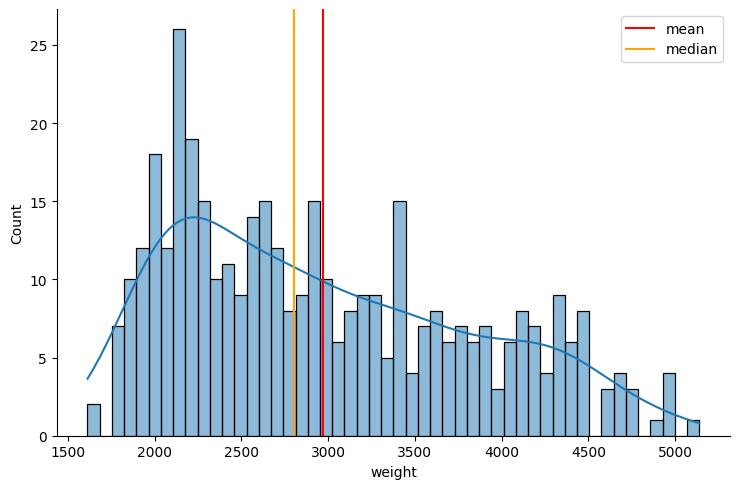

In [ ]:
# histogram using seaborn
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

mpg_df = sns.load_dataset("mpg")
ax = sns.displot(mpg_df.weight, bins=50, kde=True, aspect=1.5)

# `label` defines the name used in legend
plt.axvline(x=np.mean(mpg_df.weight), color='red', label='mean')
plt.axvline(x=np.median(mpg_df.weight), color='orange', label='median')
plt.legend(loc='upper right')

This histogram shows the distribution of the weight feature along with the mean and median. 
Notice that the mean is not equal to the median, which means that the feature 
is not normally distributed. 

Let's explore a few other plots to represent the summary statistics of data.

**Box plots** are an excellent way to examine the relationship between the summary statistics of a numerical feature in relation to other categorical features. 

Now, suppose we want to see the summary statistics of the **mpg** feature (***mileage***) classified by another feature – the ***number of cylinders***. A popular way to show such information is to use box plots. This is very easy to do with the *seaborn* library.

# **Exercise 20: Creating and Exploring a Static Box Plot**

In this exercise, we will create a box plot to analyze the relationship between **model_year** and **mileage** using the **mpg** dataset. We'll analyze manufacturing efficiency and the mileage of vehicles over a period of years. 

<Axes: xlabel='model_year', ylabel='mpg'>

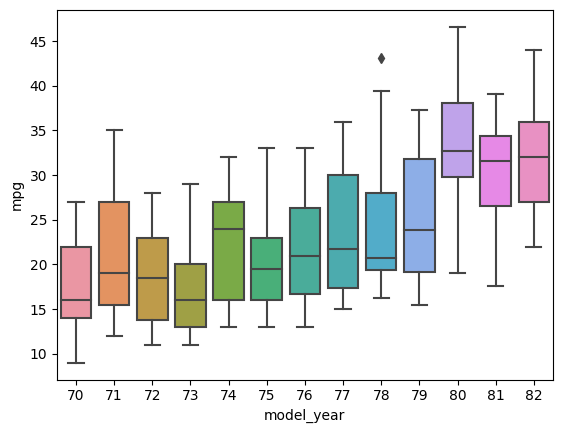

In [ ]:
# box plot: mpg(mileage) vs model_year
sns.boxplot(x='model_year', y='mpg', data=mpg_df)


As we can see, the box boundaries indicate the **interquartile range**, the upper boundary marks the 25% quartile, and the lower boundary marks the 75% quartile. 
The horizontal line inside the box indicates the **median**. Any solo points outside of the whiskers (the T-shaped bars above and below the box) mark **outliers**, while the whiskers themselves show the minimum and maximum values that are not outliers.
Apparently, *mileage* improved substantially in the 80s compared to the 70s. 

Let's add another feature to our **mpg** DataFrame that denotes whether the car was manufactured in the 70s or 80s.
Modify the **mpg** DataFrame by creating a *new feature*, **model_decade**

In [ ]:
mpg_df['model_decade'] = np.floor(mpg_df.model_year/10)*10
mpg_df['model_decade'] = mpg_df['model_decade'].astype(int)
mpg_df.tail()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,model_decade
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl,80
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup,80
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage,80
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger,80
397,31.0,4,119.0,82.0,2720,19.4,82,usa,chevy s-10,80


<Axes: xlabel='model_decade', ylabel='mpg'>

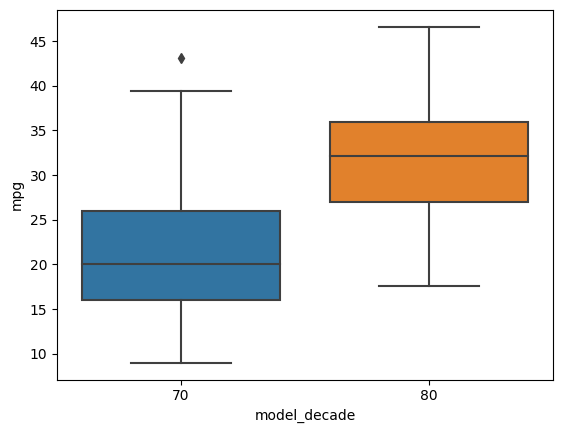

In [ ]:
# Now, let's redraw our box plot to look at mileage distribution for the two decades:

sns.boxplot(x='model_decade', y='mpg', data=mpg_df)

But wait – more can be done with boxplots. We can also add another feature, say, **region** of **origin**, and see how that affects the relationship between mileage and manufacturing time, the two features we have been considering so far. 


<Axes: xlabel='model_decade', ylabel='mpg'>

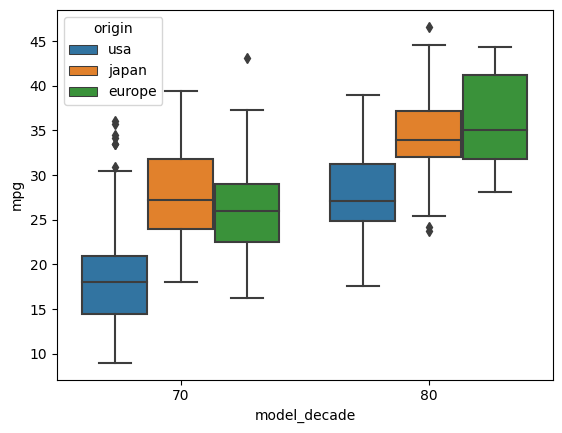

In [ ]:
# Use the hue parameter to group by origin:

sns.boxplot(x='model_decade', y='mpg', data=mpg_df, hue='origin')

As we can see, according to the **mpg** dataset, in the 70s and early 80s, Europe and Japan produced cars with better mileage than the USA. Interesting!

# **Violin Plots**
Now let's consider a different scenario. What if we could get a hint regarding the entire distribution of a specific numerical feature grouped by other categorical features? 

The right kind of visualization technique here is a **violin plot**. A violin plot is similar to a box plot, but it includes more detail about variations in the data. The shape of a violin plot tells you the shape of the data distribution –where the data points cluster around a common value, the plot is fatter, and where there are fewer data points, the plot is thinner. We will look at a concrete example with the help of an exercise.


# **Exercise 21: Creating a Static Violin Plot**
In this exercise, we will use the **mpg** dataset and generate a **violin plot** depicting the detailed variation of *mileage* (mpg) based on *model_decade* and *region* of origin:


<Axes: xlabel='model_decade', ylabel='mpg'>

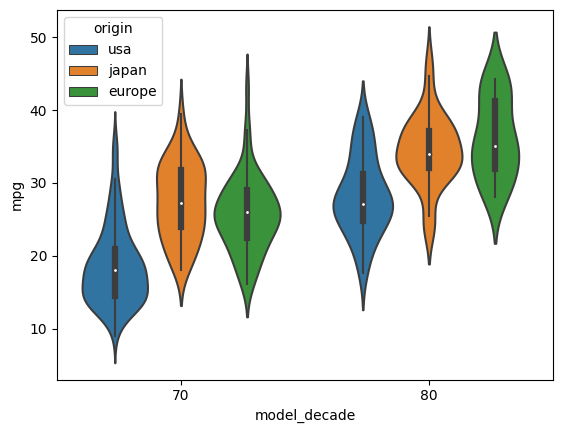

In [ ]:
# # parameter hue is used to group by a specific feature, in this case 'origin', while x represents the model year and y represent mileage
sns.violinplot(x='model_decade', y='mpg', data=mpg_df, hue='origin')

We can see here that, during the 70s, while most vehicles in the US had a median mileage of 19 mpg, vehicles in Japan and Europe had median mileages of around 27 and 25 mpg. 

While the mileages of vehicles in Europe and Japan jumped by 7 to 8 points in 
the 80s, the median mileage of vehicles in the US was still similar to that of the vehicles in Japan and Europe in the previous decade.

As we can see from the preceding plot, the fatter sections of the plot indicate ranges of higher probability of the y-axis feature, while the thinner sections indicate areas of lower probability. The thick solid line at the center of each distribution represents the interquartile range – the two ends are the 25% and 75% quantiles and the dot is the median. The thinner solid line shows 1.5 times the interquartile range